# Heart Attack Study
## Spring 2025 Data Science Project
By Kai C, Nathaniel G, Josiah L, Joseph T


### Contributions:

Kai:

Josiah:

Nathaniel:

Joseph:

## Introduction

Our topic is that we are trying to predict heart attacks using many different features of a person like cholesterol, heart rate, age etc. The question that our team is trying to answer in our analysis is if there is a feature or specfic features that will help predict if someone has a heart attack? Answering these questions are very important because it could help save peoples' lives by determining if we can predict if someone will have a heart attack based on their current features.


## Data Curation

### Data Preprocessing

The dataset file that we are using is from Kaggle and is a csv file that consists of a lot of different features of people like heart rate and blood pressure. Since the dataset file is too large, we will download the csv file (https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states) and keep it in the downloads folder.

This particular data set has 372,974 observations and 32 columns,
so there is a significant amount of sample data. Our team believes that this data set
will provide sufficient data for finding correlations between the many columns, such as
demographics and health data points like cholesterol levels to check if someone had a
heart attack or not. There is a sufficient amount of data from this data set
to provide hypothesis testing, data preprocessing, machine learning analysis,
visualization, insights and conclusions in order to predict how and why people have
heart attacks.

We will then import pandas and read the csv file and convert it into a Pandas DataFrame.

### Import Libraries (and setting up):

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

pd.set_option('display.max_columns', None)

### Read CSV file:

In [132]:
heart_attack_df = pd.read_csv('~/Downloads/heart_attack_dataset.csv')
# heart_attack_df = pd.read_csv('heart_attack_dataset.csv')

### Remove Rows with NULL values:

In [133]:
heart_attack_df = heart_attack_df.dropna()

print("Rows: " + str(len(heart_attack_df.index)))


Rows: 372974


### Parsing:

We used one-hot encoding to changed all categorical features into binary values of 0 and 1. Features with the bool values 1 (True) and 0 (False) we converted to the corresponding boolean value.

In [134]:
# one-hot encoding
for_ml_heart_attack_df = heart_attack_df.copy()
for feature in heart_attack_df.columns:
    if all(isinstance(row, str) for row in for_ml_heart_attack_df[feature]): # should only do one-hot encoding if column has string values
        index = for_ml_heart_attack_df.columns.get_loc(feature)
        count = 0

        # handles edge case of features containing str yes/no values
        if for_ml_heart_attack_df[feature].iloc[0].casefold() == 'yes' or for_ml_heart_attack_df[feature].iloc[0].casefold() == 'no':
            for_ml_heart_attack_df[feature] = for_ml_heart_attack_df[feature].apply(lambda value : 1 if value.casefold() == 'yes' else 0)        
        elif feature == 'Outcome': # handles edge case of outcome feature
            for_ml_heart_attack_df[feature] = for_ml_heart_attack_df[feature].apply(lambda value : 1 if value.casefold() == 'heart attack' else 0)
        else: # creates new columns from the one-hot encoding
            dummies = pd.get_dummies(for_ml_heart_attack_df[feature], dtype=int)
            for new_col in dummies:
                # edge case features
                if feature.casefold() == 'diet' or feature.casefold() == 'chestpaintype' or feature.casefold() == 'ecgresults' or feature.casefold() == 'thalassemia' or feature.casefold() == 'thalassemia':
                    for_ml_heart_attack_df.insert(index+count, column=feature+'_'+new_col, value=dummies[new_col].values)
                # all other feaetures
                else:
                    for_ml_heart_attack_df.insert(index+count, column=new_col, value=dummies[new_col].values)
                count+=1
            
            # remove the old feature
            for_ml_heart_attack_df.drop(feature, axis=1, inplace=True)

display(len(for_ml_heart_attack_df.columns))
display(for_ml_heart_attack_df.head())

# features with bool True/False values
heart_attack_df['Smoker'] = heart_attack_df['Smoker'].apply(lambda value : True if value == 1 else False)
heart_attack_df['Diabetes'] = heart_attack_df['Diabetes'].apply(lambda value : True if value == 1 else False)
heart_attack_df['Hypertension'] = heart_attack_df['Hypertension'].apply(lambda value : True if value == 1 else False)
heart_attack_df['FamilyHistory'] = heart_attack_df['FamilyHistory'].apply(lambda value : True if value == 1 else False)
heart_attack_df['PreviousHeartAttack'] = heart_attack_df['PreviousHeartAttack'].apply(lambda value : True if value == 1 else False)
heart_attack_df['StrokeHistory'] = heart_attack_df['StrokeHistory'].apply(lambda value : True if value == 1 else False)

display(heart_attack_df.head())

57

,Age,Female,Male,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,Diet_Healthy,Diet_Moderate,Diet_Unhealthy,StressLevel,Asian,Black,Hispanic,Other,White,Income,College,High School,Postgraduate,Medication,ChestPainType_Asymptomatic,ChestPainType_Atypical,ChestPainType_Non-anginal,ChestPainType_Typical,ECGResults_LV hypertrophy,ECGResults_Normal,ECGResults_ST-T abnormality,MaxHeartRate,ST_Depression,ExerciseInducedAngina,Downsloping,Flat,Upsloping,NumberOfMajorVessels,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,PreviousHeartAttack,StrokeHistory,Rural,Suburban,Urban,Employed,Retired,Unemployed,Divorced,Married,Single,Widowed,Outcome
0,31,0,1,194,162,71,22.9,0,1,0,0,6,0,0,0,1,1,0,0,1,0,0,64510,0,1,0,1,0,0,0,1,0,0,1,173,0.52,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,69,0,1,208,148,93,33.9,1,1,0,0,1,2,0,0,1,6,1,0,0,0,0,91773,1,0,0,0,0,1,0,0,1,0,0,189,3.79,1,0,0,1,2,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,34,1,0,132,161,94,34.0,0,0,1,1,1,3,1,0,0,3,0,1,0,0,0,173550,1,0,0,0,0,0,1,0,0,1,0,122,0.17,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1
3,53,0,1,268,134,91,35.0,0,1,1,0,6,0,1,0,0,3,0,0,1,0,0,43861,0,1,0,1,0,1,0,0,0,0,1,104,0.67,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
4,57,1,0,203,140,75,30.1,0,1,0,0,4,1,0,1,0,1,0,0,1,0,0,83404,0,1,0,1,0,0,0,1,0,0,1,126,5.00,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1


,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,Diet,StressLevel,Ethnicity,Income,EducationLevel,Medication,ChestPainType,ECGResults,MaxHeartRate,ST_Depression,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,False,True,False,False,6,0,Unhealthy,1,Hispanic,64510,High School,Yes,Typical,ST-T abnormality,173,0.52,Yes,Downsloping,1,Normal,False,False,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,True,True,False,False,1,2,Unhealthy,6,Asian,91773,College,No,Atypical,LV hypertrophy,189,3.79,Yes,Upsloping,2,Normal,False,False,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,False,False,True,True,1,3,Healthy,3,Black,173550,College,No,Non-anginal,Normal,122,0.17,Yes,Upsloping,0,Normal,True,False,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,False,True,True,False,6,0,Healthy,3,Hispanic,43861,High School,Yes,Atypical,ST-T abnormality,104,0.67,Yes,Flat,0,Reversible defect,True,False,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,False,True,False,False,4,1,Moderate,1,Hispanic,83404,High School,Yes,Typical,ST-T abnormality,126,5.00,Yes,Flat,0,Fixed defect,True,False,Rural,Retired,Married,Heart Attack


## Exploratory Data Analysis/Data Exploration and Summary Statistics

### Exploration and Summary 1
By Joseph

I will be doing a chi sqare test comparing ethnicity to outcome. my null hypothesis is that ethnicity does not affect outcome and my alternative hypothesis is that ethnicity does affect outcome. I will reject with aplha of 0.05.

But first, i will make a contingency table

In [116]:
elmt, cnt = st.contingency.crosstab(heart_attack_df['Ethnicity'], heart_attack_df['Outcome'])
print(elmt)
print(cnt)

(array(['Asian', 'Black', 'Hispanic', 'Other', 'White'], dtype=object), array(['Heart Attack', 'No Heart Attack'], dtype=object))
[[37511 37431]
 [37140 37392]
 [37324 37026]
 [37015 37166]
 [37326 37643]]


as well as plot its results.

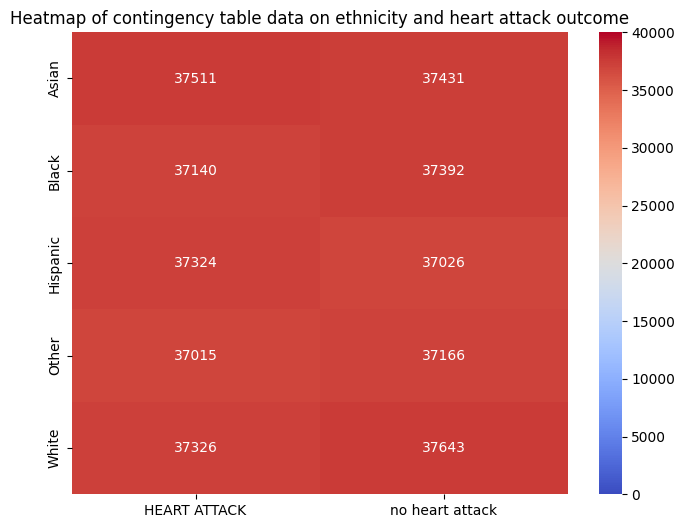

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnt, annot=True, fmt="d", cmap="coolwarm", vmin=0.0, vmax=40000.0)
plt.title("Heatmap of contingency table data on ethnicity and heart attack outcome")
plt.xticks([i+0.5 for i in range(cnt.shape[1])], ['HEART ATTACK', 'no heart attack'])
plt.yticks([i+0.5 for i in range(cnt.shape[0])], elmt[0])
plt.show()

seems quite even...

In [117]:

res = st.chi2_contingency(cnt, correction=False)
res.pvalue

np.float64(0.48306343081124736)

the chi square test gave a p value of 0.48 which is greater than the alpha of 0.05 so we fail to reject the null hypothesis.

### Exploration and Summary 2
By Josiah

I will write a two sided and two sample T test for my hypothesis test based on the independent groups of blood presssures of people that had a previous heart attack and blood pressures of people that did not have a previous heart attack. The alpha value will be 0.05.



- H0: There is no difference between the mean blood pressures of people that had a previous heart attack and the mean blood pressures of people that didn't have a previous heart attack.
- HA: There is a difference between the mean blood pressures of people that had a previous heart attack and the mean blood pressures of people that didn't have a previous heart attack.

If the ratio between the groups are less than 4:1 then we can consider the given groups to have equal variance.

In [118]:
previous_heart_attack = heart_attack_df[heart_attack_df['PreviousHeartAttack'] == True]['BloodPressure']
no_previous_heart_attack = heart_attack_df[heart_attack_df['PreviousHeartAttack'] == False]['BloodPressure']

print("Previous Heart Attack Variance: " + str(np.var(previous_heart_attack)))
print("No Previous Heart Attack Variance: " + str(np.var(no_previous_heart_attack)))

Previous Heart Attack Variance: 672.9307263333194
No Previous Heart Attack Variance: 677.4239673804153


The ratio 677.424:672.931 is less than the 4:1 ratio which allows us to assume a same variance.

In [119]:
# Two sided and two sample T test
stat, p_value = scipy.stats.ttest_ind(a=previous_heart_attack, b=no_previous_heart_attack, equal_var=True)

print("P Value: " + str(p_value))

P Value: 0.21653200354387594


The p-value of 0.217 > alpha value of 0.05, so we fail to reject the null hypothesis that there is no difference between the mean blood pressures of people that had a previous heart attack and the mean blood pressures of people that didn't have a previous heart attack.

Text(0, 0.5, 'Blood Pressure (mmHg)')

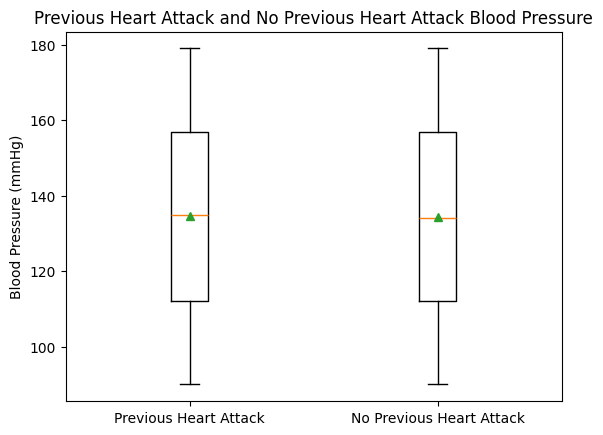

In [120]:
plt.boxplot([previous_heart_attack, no_previous_heart_attack], tick_labels=["Previous Heart Attack", "No Previous Heart Attack"], showmeans=True)
plt.title('Previous Heart Attack and No Previous Heart Attack Blood Pressure')
plt.ylabel('Blood Pressure (mmHg)')

This plots boxplots for the two groups. Note that the green triangles represent the mean and the red line represents the median.

### Exploration and Summary 3
By Kai

I will write a new hypothesis test based on four categorical variables, thus, I will be using ANOVA tests.

The following is a hypothesis test for whether the marital status has an effect on the outcome of a heart attack. (Assume $\alpha=0.05$).

- H0: The marital status does not have an effect on the outcome of whether one has a heart attack (i.e., they're independent).

- HA: The martial status does have an effect on the outcome of whether one has a heart attack.

I will first split the data into 4 different dataframes based on marital status.

In [121]:
# to tell me what the categorical variables were
# heart_attack_df['MaritalStatus'].unique()

single = heart_attack_df['MaritalStatus'] == 'Single'
married = heart_attack_df['MaritalStatus'] == 'Married'
widowed = heart_attack_df['MaritalStatus'] == 'Widowed'
divorced = heart_attack_df['MaritalStatus'] == 'Divorced'

# store the proportions of 'No Heart Attack' and 'Heart Attack'
single_proportion = heart_attack_df[single]['Outcome'].value_counts(normalize=True)
married_proportion = heart_attack_df[married]['Outcome'].value_counts(normalize=True)
widowed_proportion = heart_attack_df[widowed]['Outcome'].value_counts(normalize=True)
divorced_proportion = heart_attack_df[divorced]['Outcome'].value_counts(normalize=True)

display([single_proportion, married_proportion, widowed_proportion, divorced_proportion])

[Outcome
 No Heart Attack    0.500347
 Heart Attack       0.499653
 Name: proportion, dtype: float64,
 Outcome
 Heart Attack       0.500894
 No Heart Attack    0.499106
 Name: proportion, dtype: float64,
 Outcome
 No Heart Attack    0.501075
 Heart Attack       0.498925
 Name: proportion, dtype: float64,
 Outcome
 No Heart Attack    0.5013
 Heart Attack       0.4987
 Name: proportion, dtype: float64]

Next, I will use an ANOVA test called the one-way ANOVA test, which tests the null hypothesis that two or more groups have the same population proportion, and will have the test yield a p-value.

This hypothesis test is one of the only ways to test multiple categorical variables.

In [122]:
# ANOVA test
anova_test = scipy.stats.f_oneway(single, married, widowed, divorced)

anova_test.pvalue

np.float64(0.1399070014962428)

I will create a bar chart to show the relationship between marital status and the outcome of whether one has a heart attack.

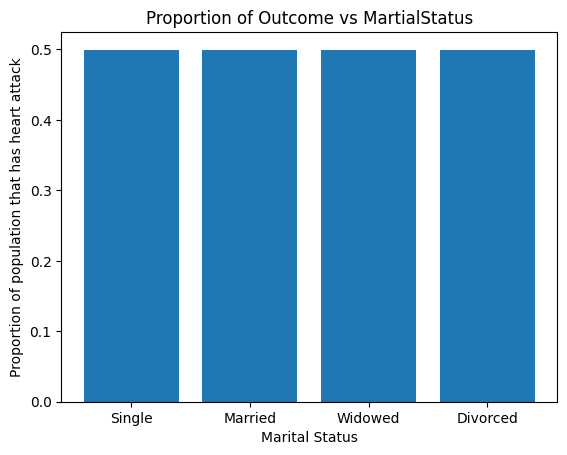

In [123]:
x_var = np.array(['Single', 'Married', 'Widowed', 'Divorced'])
y_var = np.array([single_proportion.iloc[1], married_proportion.iloc[1], widowed_proportion.iloc[1], divorced_proportion.iloc[1]])

plt.bar(x_var, y_var)
plt.title('Proportion of Outcome vs MartialStatus')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of population that has heart attack')
plt.show()

Since the p-value = 0.14 > (alpha = 0.05), we fail to reject the null hypothesis.

### Exploration and Summary 4
By Nathaniel

Conducting a hypothesis test to determine whether or not level of cholesterol has an effect on the outcome of a heart attack. 

For the purposes of this test,  I will assume the population standard deviation is unknown. Therefore I will use a two-sample T-test with level of significance $\alpha=0.05$.

- H0: Above-average cholesterol does not have an effect on the outcome of whether a heart attack occured
- HA: Above-average cholesterol does have an effect on the outcome of whether a heart attack occured.

To conduct this test, the data is split into two samples based on whether or not cholesterol is above the mean of the sample:

In [124]:
#convert object type data to numeric for stats.ttest_ind()
heart_attack_df['outcome_numeric'] = heart_attack_df['Outcome'].map({'No Heart Attack': 0, 'Heart Attack': 1})

mean = heart_attack_df['Cholesterol'].mean()

low_col_df = heart_attack_df[heart_attack_df['Cholesterol'] < mean]['outcome_numeric']
high_col_df = heart_attack_df[heart_attack_df['Cholesterol'] >= mean]['outcome_numeric']

In [125]:
t_stat, p_value = scipy.stats.ttest_ind(low_col_df, high_col_df, equal_var=False) 
p_value

np.float64(0.13103144828583682)

The p-value (0.131) >= 0.05, indicates no significant difference between the groups. We fail to reject the null hypothesis.

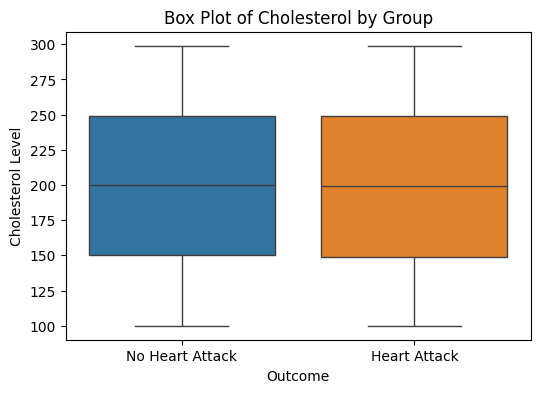

In [126]:
plt.figure(figsize=(6, 4))
plt.xlabel("Outcome")
plt.ylabel("Cholesterol Level")
plt.title("Box Plot of Cholesterol by Group")
sns.boxplot(x="Outcome", y="Cholesterol", data=heart_attack_df, hue="Outcome", legend=False)

plt.show()

(There appears to be little difference in the summary statistics for these two groups, thus resulting in the similar boxplots)

In [127]:
print(heart_attack_df.groupby("Outcome")["Cholesterol"].describe())

                    count        mean        std    min    25%    50%    75%  \
Outcome                                                                        
Heart Attack     186316.0  199.342504  57.758458  100.0  149.0  199.0  249.0   
No Heart Attack  186658.0  199.568976  57.688280  100.0  150.0  200.0  249.0   

                   max  
Outcome                 
Heart Attack     299.0  
No Heart Attack  299.0  


Below is a Bar plot that compares the number of those who had heart attacks with those that did not for individuals with above average Cholesterol.

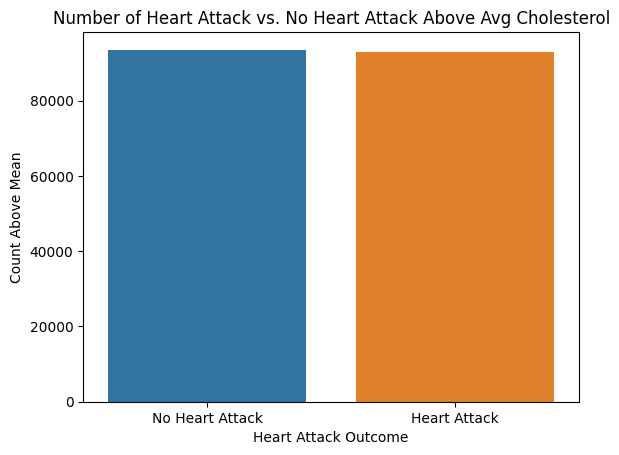

Outcome
No Heart Attack    93502
Heart Attack       92870
Name: count, dtype: int64

In [128]:
above_mean_df = heart_attack_df[heart_attack_df['Cholesterol'] > mean]

group_counts = above_mean_df['Outcome'].value_counts()

sns.barplot(x=group_counts.index, y=group_counts.values, hue=group_counts.index, legend=False)

plt.xlabel("Heart Attack Outcome")
plt.ylabel("Count Above Mean")
plt.title("Number of Heart Attack vs. No Heart Attack Above Avg Cholesterol")

plt.show()
group_counts

## Primary Analysis

### KNN Classifier
We are going to train a KNN classifier model in order to predict whether someone with Kai C.'s features will get a heart attack or not.

In [ ]:
# X should be all the features minus outcome, Y should be the outcome
X = for_ml_heart_attack_df.drop('Outcome', axis='columns')
Y = for_ml_heart_attack_df['Outcome']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train_no_norm = X_train.copy()

binary_one_hot_cols = X_train.columns[X_train.apply(lambda col: set(col.unique()) == {0, 1})]

X_train_binary_one_hot = X_train[binary_one_hot_cols]
X_test_binary_one_hot = X_test[binary_one_hot_cols]


X_train_cont = X_train.drop(columns = binary_one_hot_cols)

# Scaling the X data        changed it sot hat second one is just transform. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_cont)  
X_test = scaler.transform(X_test[X_train_cont.columns]) 


X_train = np.column_stack((X_train,X_train_binary_one_hot ))
X_test = np.column_stack((X_test,X_test_binary_one_hot ))



In [ ]:
knn_model = KNeighborsClassifier()

# Perform k-fold Cross-Validation for the knn model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


# check if knn model is accurate using training data and cross validation
cross_validation_accuracy = cross_val_score(knn_model, X_train, y_train, cv=skf)
print(f"Mean: {cross_validation_accuracy.mean()}")
print(f"Standard deviation: {cross_validation_accuracy.std()}")

# check if knn model is accurate using test data and cross validation
cross_validation_accuracy = cross_val_score(knn_model, X_test, y_test, cv=skf)
print(f"Mean: {cross_validation_accuracy.mean()}")
print(f"Standard deviation: {cross_validation_accuracy.std()}")

# now we see if our knn model predicts if someone with Kai's features will get a heart attack or not
knn_model.fit(X_train, y_train)
knn_model.predic


predict_kai = knn_model.predict(np.array([21, 0, 1, 130, 140, 70,
       21, 0, 0, 0, 0,
       2, 0, 0,
       1, 0, 3, 1, 0,
       0, 0, 0, 10000, 1, 0,
       0, 0, 0,
       0, 0,
       0, 0,
       0, 0, 180,
       0, 0, 0, 0,
       0, 2, 0,
       0, 0,
       0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1,
       0]).reshape(1, -1))

display("Kai will get a heart attack" if predict_kai == 1 else "Kai will not get a heart attack")

Mean: 0.49866779494902974
Standard deviation: 0.0018827438043538228
Mean: 0.5026342248139956
Standard deviation: 0.0015993877393331117


'Kai will not get a heart attack'

If the cross-validation score of the mean is above 0.9 for both training and test data, then it has done well with the training data. The cross-validation scores are way below 0.9 for both the training and the test data so this shows that the KNN classifier is not very accurate in predicting whether someone will get a heart attack or not.

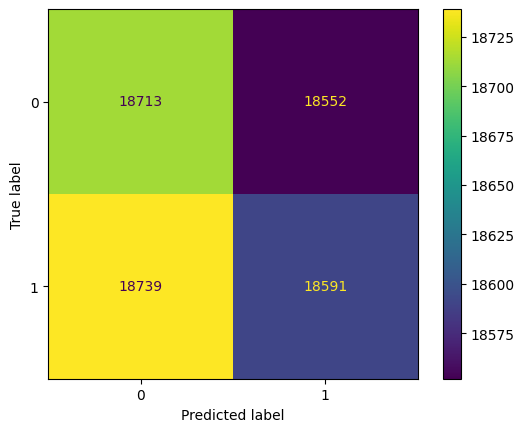

In [149]:
y_pred = knn_model.predict(X_test)

# Creates the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plots the confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

This displayed confusion matrix shows that relatively there are a lot of false positive (when the True label is 0 (no heart attack) but was marked as a 1 (heart attack) for the Predicted label) compared to the number of correct predictions of heart attacks (Both True label and Predicted label are marked as 1 (heart attack)). The displayed confusion matrix also shows that relatively there are a lot of false negatives (when the Predicted label is marked as 0 (no heart attack) but the True label was marked as 1 (heart attack)) compared to the number of correct predictions of no heart attack (Both True label and Predicted label are marked as 0 (no heart attack)). This shows that our KNN classifier is very inaccurate in determining if someone has a heart attack or not.

### PCA

Text(0, 0.5, 'cumulative explained variance')

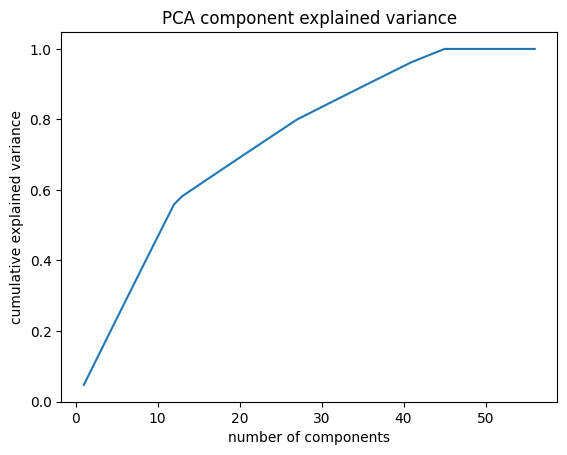

In [135]:
seed = 42

pca = PCA()
pca.fit(X_train)

plt.figure()
plt.plot(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())

plt.title("PCA component explained variance")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")



This shows that there isnt any good single thing that explains varaince well. At least better than nothing i choose to use the first 30 components as that gives me around 80% of the variance. I may choose a different value in the future depening on how things go.

In [136]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_train)


distortions = []
inertias = []
K = range(1, 10)

for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X_pca)

    # get distortions and inertias
    distortions.append(sum(np.min(cdist(X_pca, kmeans_model.cluster_centers_, metric='euclidean')**2, axis=1)))
    inertias.append(kmeans_model.inertia_)


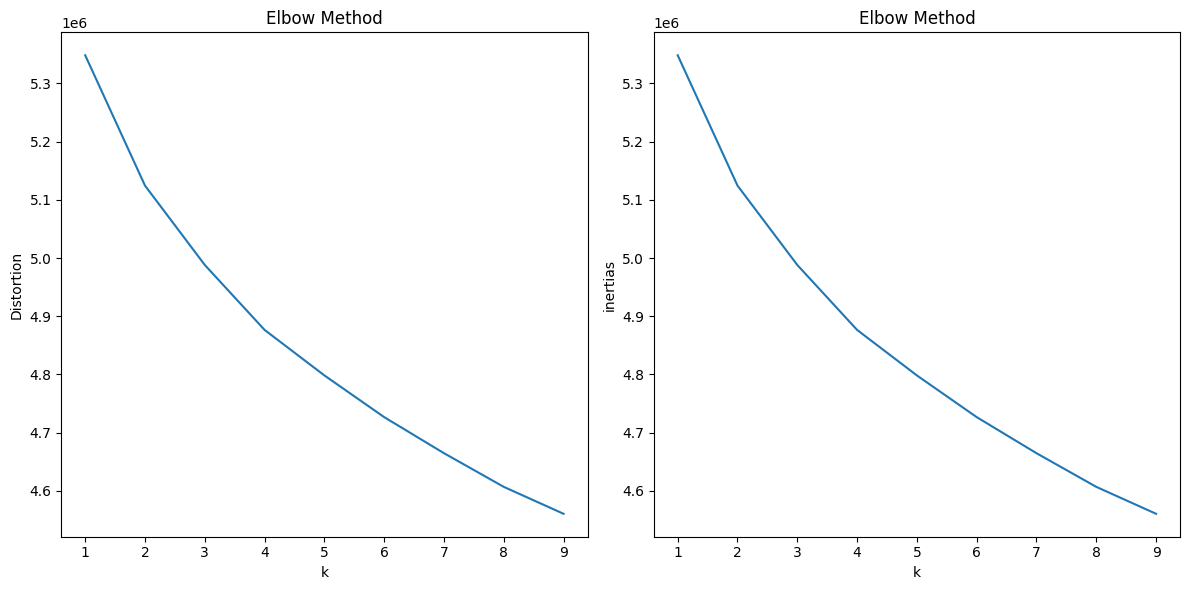

In [137]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(K, distortions)
ax[0].set_xlabel('k')
ax[0].set_ylabel('Distortion')
ax[0].set_title("Elbow Method")

# ax[1] = plt.subplot()
ax[1].plot(K, inertias)
ax[1].set_xlabel('k')
ax[1].set_ylabel('inertias')
ax[1].set_title("Elbow Method")
plt.tight_layout()
plt.show()

Based on the elbow method, our team will be using a k = 2 which is the number of clusters that we will use.

In [34]:
X_train.shape

(298379, 56)

Now we will plot the clusters.

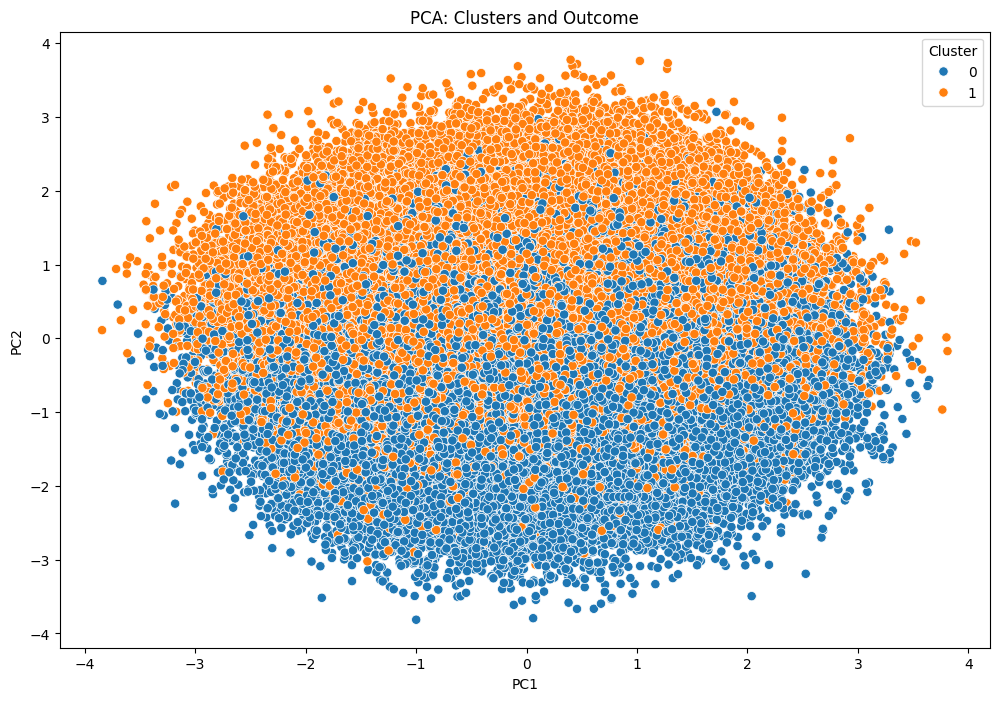

In [60]:
def plot_clusters(Xer,  title, xlabel, ylabel, for_ml_df_0):
    # this first line is factually wrong as it gets cols mixed up but idt it metters here
    # print(for_ml_df_0.shape)
    for_ml_df = pd.DataFrame(for_ml_df_0, columns=X.columns)
    # print(for_ml_df.shape)
    fig, ax = plt.subplots(figsize=(12, 8))
    kmeans = KMeans(n_clusters=2, random_state=seed).fit(Xer)
    # print(pd.Categorical(kmeans.labels_).shape)
    for_ml_df['Cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x=Xer[:, 0],y=Xer[:, 1], hue="Cluster", data=for_ml_df,s=45,legend="full")
    # plt.legend(labels=[features[0], features[1], features[2], features[3]])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plotclusterxtrain = X_train.copy()
plot_clusters(X_pca, 'PCA: Clusters and Outcome', 'PC1', 'PC2', plotclusterxtrain)

Interesting that there is a bit of each K mean on each side. (Maybe expand here)

In [138]:
continuous_features = X_train_cont.columns
binary_features = binary_one_hot_cols


components = pca.components_
# features = X.columns
features = list(continuous_features) + list(binary_features)
pca_loadings = pd.DataFrame(components, columns=features)
pca_loadings


,Age,Cholesterol,BloodPressure,HeartRate,BMI,PhysicalActivity,AlcoholConsumption,StressLevel,Income,MaxHeartRate,ST_Depression,NumberOfMajorVessels,Female,Male,Smoker,Diabetes,Hypertension,FamilyHistory,Diet_Healthy,Diet_Moderate,Diet_Unhealthy,Asian,Black,Hispanic,Other,White,College,High School,Postgraduate,Medication,ChestPainType_Asymptomatic,ChestPainType_Atypical,ChestPainType_Non-anginal,ChestPainType_Typical,ECGResults_LV hypertrophy,ECGResults_Normal,ECGResults_ST-T abnormality,ExerciseInducedAngina,Downsloping,Flat,Upsloping,Thalassemia_Fixed defect,Thalassemia_Normal,Thalassemia_Reversible defect,PreviousHeartAttack,StrokeHistory,Rural,Suburban,Urban,Employed,Retired,Unemployed,Divorced,Married,Single,Widowed
0,0.244152,0.581182,0.384116,0.186705,0.158682,-0.298191,0.121334,0.115180,0.295107,0.359193,-0.168571,0.183134,0.002529,-0.002529,0.000401,-0.000189,-0.000357,0.000301,0.000138,0.001942,-0.002080,0.000942,-0.001084,0.000483,-0.000038,-0.000304,-0.000323,0.000075,0.000248,0.002714,-0.000357,-0.000606,0.001459,-0.000496,0.001156,0.000364,-0.001520,-0.000292,0.001484,-0.002892,0.001409,-0.001689,0.000742,0.000947,0.001713,-0.000130,0.001319,-0.001487,0.000167,0.000858,-0.000853,-0.000005,-0.000533,0.001188,-0.000495,-0.000160
1,0.037891,-0.259819,0.109496,-0.115930,-0.438116,-0.252142,0.377022,0.507811,-0.206658,0.089174,0.196152,0.401105,0.001614,-0.001614,-0.001016,-0.000610,0.000700,0.000053,-0.001382,0.000556,0.000826,-0.000207,0.000940,-0.000265,0.000820,-0.001288,0.000892,-0.000181,-0.000711,0.002294,0.000055,-0.000424,-0.000445,0.000814,-0.000010,-0.000963,0.000973,-0.000530,-0.000615,0.001345,-0.000730,-0.000694,-0.000861,0.001555,0.000380,0.000647,-0.003417,0.001909,0.001507,-0.000225,0.000725,-0.000500,-0.000438,0.001312,-0.003571,0.002697
2,-0.491149,-0.063239,0.254415,0.563998,-0.291694,0.024455,-0.258467,0.089778,0.066590,0.273872,0.275680,-0.236365,-0.001175,0.001175,0.003276,0.000059,0.001315,0.000376,0.000635,-0.000044,-0.000591,-0.000009,-0.000374,0.001323,-0.000459,-0.000482,-0.001748,0.002037,-0.000289,0.000055,-0.000884,0.002527,0.001008,-0.002651,-0.002214,0.000984,0.001230,0.000195,-0.003211,0.003712,-0.000502,0.000002,-0.001938,0.001936,0.000604,-0.001877,-0.000230,0.001936,-0.001706,-0.000541,0.000159,0.000382,0.000412,-0.001120,-0.000767,0.001475
3,0.397723,0.064287,0.391687,-0.319826,-0.339862,0.360676,-0.263983,0.103294,0.333104,-0.173622,0.299466,-0.158682,0.003382,-0.003382,-0.000306,0.002076,-0.001181,0.000753,-0.001074,0.000407,0.000667,-0.000420,0.000447,0.001113,-0.000344,-0.000796,0.000357,-0.002014,0.001657,0.000644,0.000027,0.000326,-0.000453,0.000099,-0.001143,-0.000095,0.001238,0.000343,0.001022,-0.000789,-0.000233,0.002471,-0.001514,-0.000957,0.000769,-0.000178,-0.001340,-0.000079,0.001419,-0.001137,0.000970,0.000167,-0.000056,0.000032,0.001034,-0.001009
4,0.034893,-0.297926,-0.069917,-0.312110,0.063583,-0.115943,-0.354410,0.404820,0.064080,0.463669,-0.431047,-0.309482,0.003621,-0.003621,-0.000488,0.000356,-0.001283,0.000106,0.001428,-0.001013,-0.000415,-0.000822,-0.000219,0.000657,-0.000217,0.000600,-0.001848,-0.000177,0.002025,-0.000363,0.000870,-0.001178,0.001306,-0.000997,0.000607,-0.000950,0.000344,0.001505,-0.000289,-0.000757,0.001046,-0.000013,-0.000615,0.000628,-0.001047,0.001784,0.000169,-0.000932,0.000763,0.002488,-0.001969,-0.000519,-0.000983,0.001650,0.000834,-0.001501
5,0.225977,0.287994,-0.336323,0.049252,0.261271,0.319343,-0.097064,0.287467,-0.379707,0.347811,0.471763,-0.018942,-0.002522,0.002522,-0.001061,0.000653,-0.000761,0.000355,-0.002673,0.000638,0.002036,0.001115,-0.000100,-0.001062,-0.000028,0.000075,-0.000138,0.002441,-0.002303,-0.001857,0.000358,0.001226,-0.000289,-0.001295,-0.001630,0.002197,-0.000567,-0.001206,0.001020,-0.001892,0.000872,-0.000758,0.002178,-0.001420,0.001911,0.001287,0.000718,-0.001916,0.001198,-0.000022,0.000929,-0.000907,0.001470,-0.001160,0.000130,-0.000440
6,-0.303274,-0.011807,-0.301981,-0.052082,0.129208,0.342761,0.407989,0.2

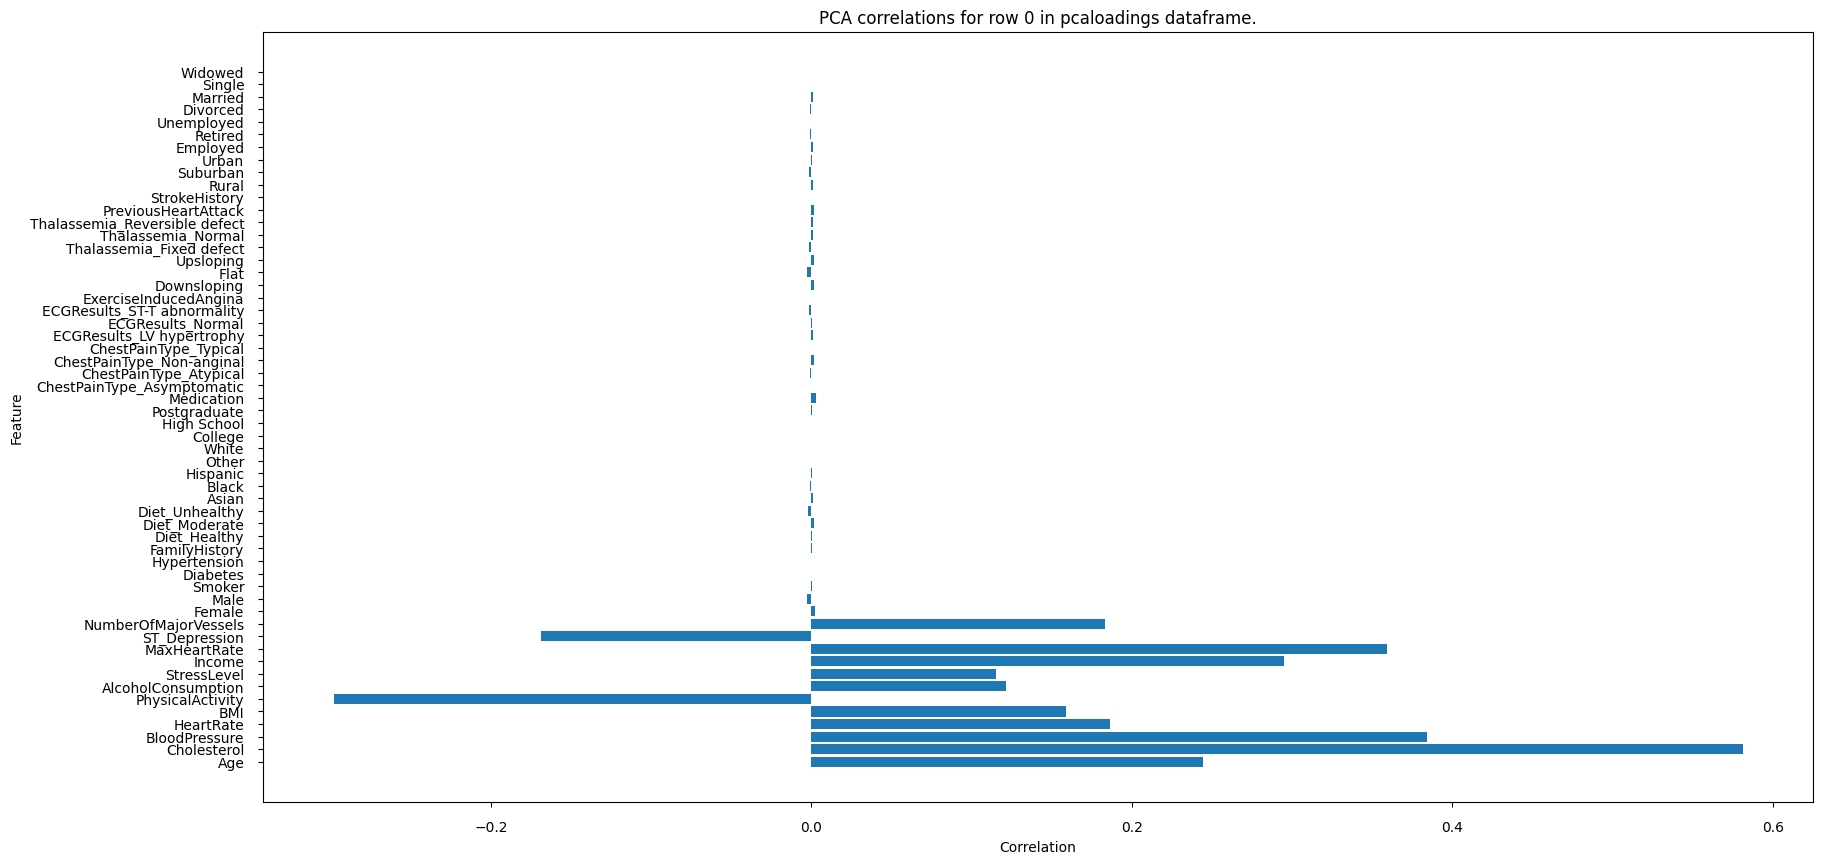

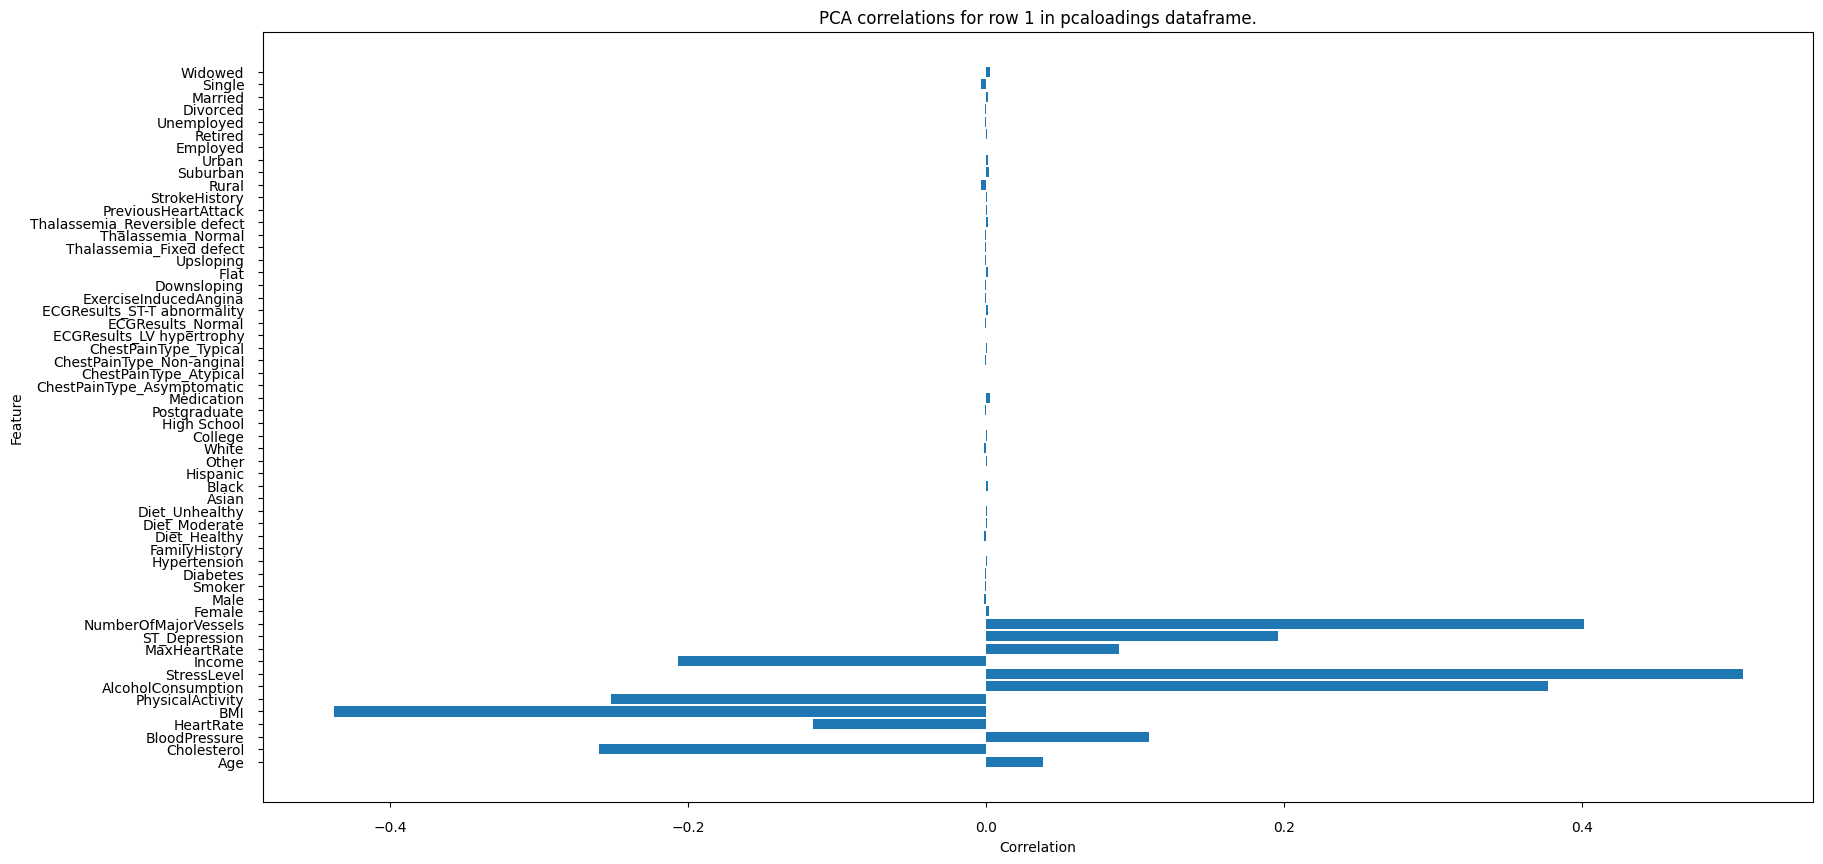

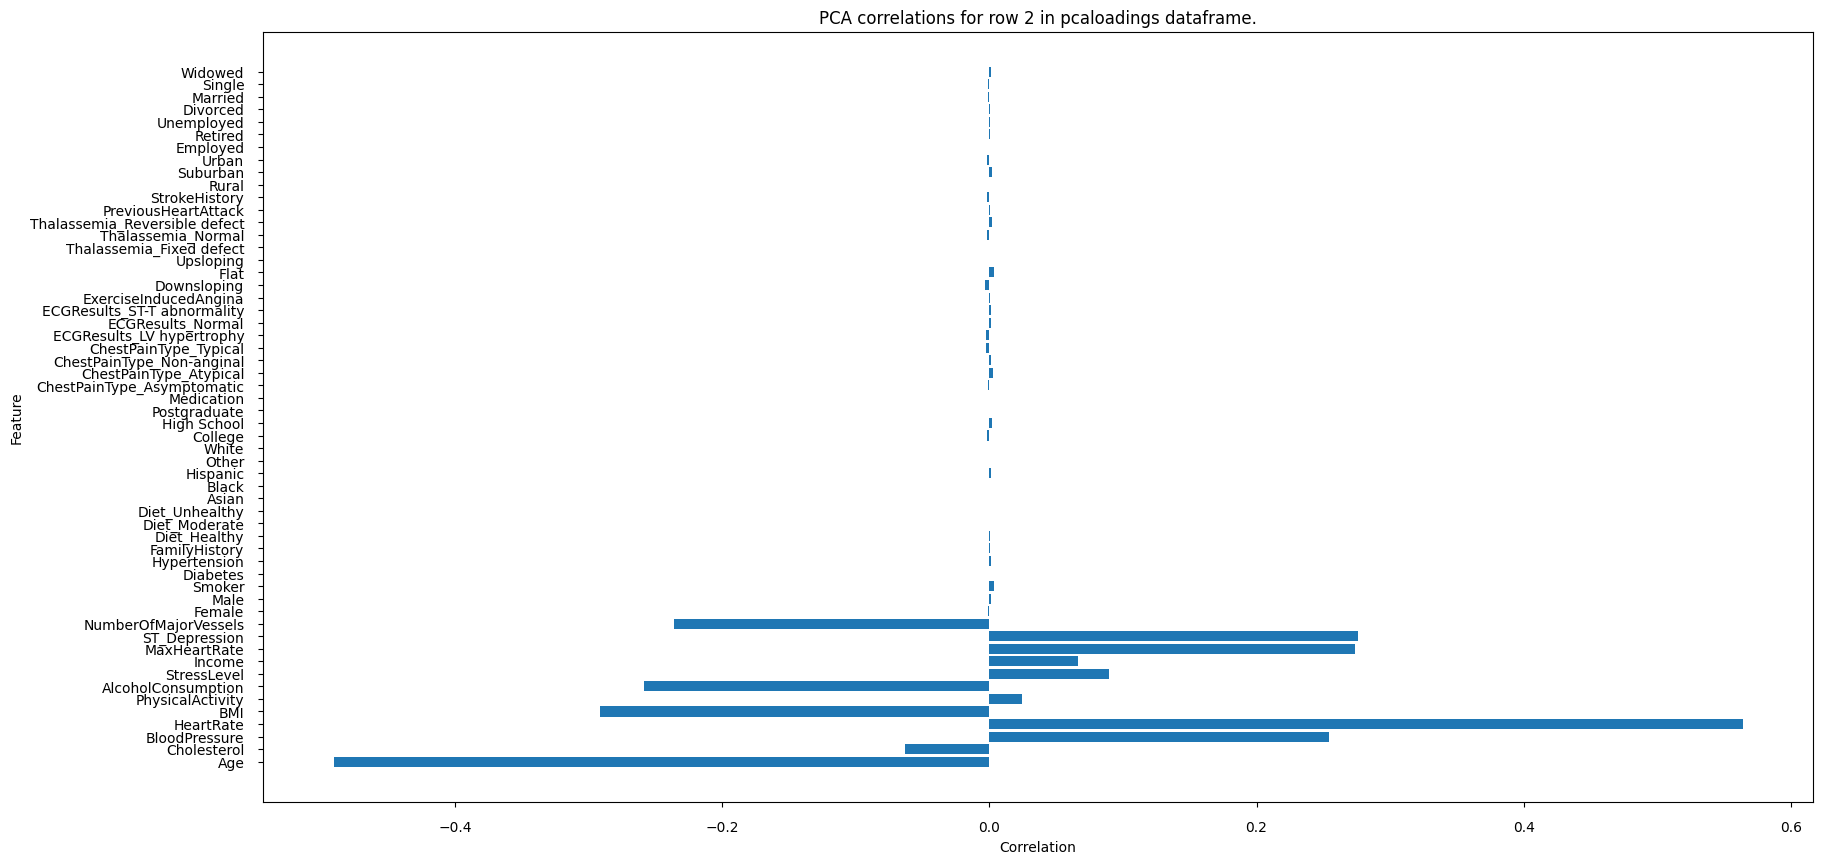

In [ ]:
top_pca = pca_loadings.head(3)

for index, row in top_pca.iterrows():

    figure, ax = plt.subplots(figsize=(20, 10))

    bar_plot = ax.barh(features, row)

    ax.xaxis.set_tick_params(pad=10)
    ax.yaxis.set_tick_params(pad=10)

    ax.set_xlabel("Correlation")
    ax.set_ylabel("Feature")
    ax.set_title("Feature correlations for row " + str(index) + " in pcaloadings dataframe.")

These show the plots of the top 3 PCA combinations and the correlation of each of the features. Row 0 in pcaloading would have the best PCA combination and then the next would be row 1 and etc. The best PCA in row 0 of the pcaloading dataframe would have Cholesterol and HeartRate as the highest correlation values.

in the below cell i am adding on a new col to the x data that is the k means cluster result.

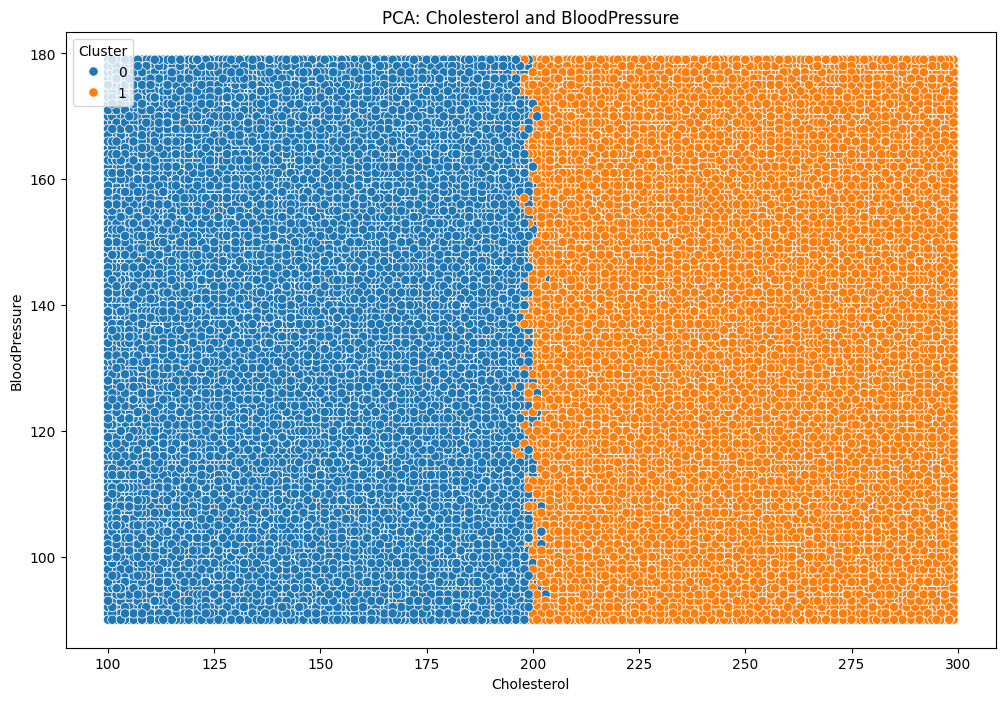

In [148]:
def plot_clusters(Xer,  title, xlabel, ylabel, for_ml_df_0):
    
    for_ml_df = pd.DataFrame(for_ml_df_0, columns=list(continuous_features) + list(binary_features))
    fig, ax = plt.subplots(figsize=(12, 8))
    kmeans = KMeans(n_clusters=2, random_state=seed).fit(Xer)
    for_ml_df['Cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x=for_ml_df["Cholesterol"],y=for_ml_df["BloodPressure"], hue="Cluster", data=for_ml_df,s=45,legend="full")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plotclusterxtrain = X_train_no_norm.copy()
plot_clusters(X_pca, 'PCA: Cholesterol and BloodPressure', 'Cholesterol', 'BloodPressure', plotclusterxtrain)

This plot shows visual confirmation that the PCA is splitting on the Cholesterol feature.

In [145]:

# cluster_labels_tr = KMeans(n_clusters=2, random_state=seed).fit_predict(X_pca)
# cluster_labels_te = KMeans(n_clusters=2, random_state=seed).fit_predict(X_pca)

# X_scaled_tr = StandardScaler().fit_transform(X_train)
# X_scaled_te = StandardScaler().fit_transform(X_test)



# pca = PCA(n_components=30)

# pca = PCA(n_components=36)


# X_pca_tr = pca.fit_transform(X_train)         no need is literally X_pca

from sklearn.preprocessing import OneHotEncoder
# applying one hot to the k means cluster.

X_pca_te = pca.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=seed).fit(X_pca)

cluster_labels_tr = kmeans.predict(X_pca)
cluster_labels_te = kmeans.predict(X_pca_te)

cluster_labels_tr = cluster_labels_tr.reshape(-1, 1)
cluster_labels_te = cluster_labels_te.reshape(-1, 1)

encoder = OneHotEncoder()

cluster_labels_tr_one_hot = encoder.fit_transform(cluster_labels_tr).toarray()
cluster_labels_te_one_hot = encoder.transform(cluster_labels_te).toarray()
X_train_c = np.hstack((X_train,cluster_labels_tr_one_hot ))
X_test_c = np.hstack((X_test,cluster_labels_te_one_hot ))


### RandomForestClassifier

We will now be using a RandomForestClassifier as another machine learning technique to try to predict heart attack outcomes.

In [146]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=seed)

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

score = cross_val_score(model, X_train_c, y_train, cv=skf)
print(f'RandomForestClassifier: mean = {np.mean(score)}, std = {np.std(score)}')

RandomForestClassifier: mean = 0.4997235144911695, std = 0.0017904717475305152


In [147]:
model = model.fit(X_train_c, y_train)

In [65]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

y_pred = model.predict(X_test_c)
accuracy = accuracy_score(y_test ,y_pred)

# def classification_report(y_test, y_pred):
#     acc = accuracy_score(y_test ,y_pred)
#     stringy = f'accuracy: {}'
print(f"Accuracy of RandomForestClassifier: {accuracy:.3f}") # Your accuracy table header here
print(classification_report(y_test, y_pred)) # Implement your classification report here

Accuracy of RandomForestClassifier: 0.503
              precision    recall  f1-score   support

           0       0.50      0.55      0.52     37312
           1       0.50      0.46      0.48     37283

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



The accuracy, precision, recall, f1-score all have really low values which shows that the Random Forest Classifier is not good in predicting if someone has a heart attack or not.

## Visualization

We will now be plotting a confusion matrix as a heatmap to show the instances of each of the predictions of whether someone has a heart attack or not compared to the actual scenario when someone either has a heart attack or not.

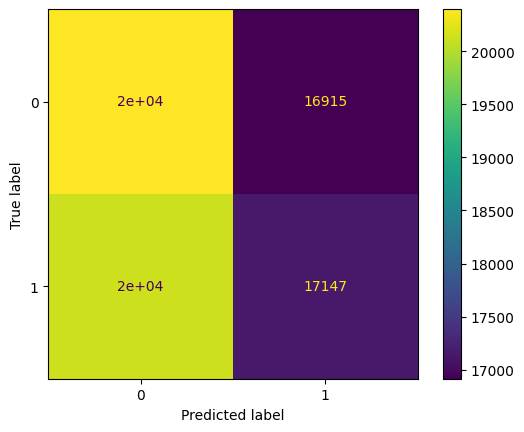

In [ ]:
# Creates the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plots the confusion matrix
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()

This displayed confusion matrix shows that relatively there are a lot of false positive (when the True label is 0 (no heart attack) but was marked as a 1 (heart attack) for the Predicted label) compared to the number of correct predictions of heart attacks (Both True label and Predicted label are marked as 1 (heart attack)). The displayed confusion matrix also shows that relatively there are a lot of false negatives (when the Predicted label is marked as 0 (no heart attack) but the True label was marked as 1 (heart attack)) compared to the number of correct predictions of no heart attack (Both True label and Predicted label are marked as 0 (no heart attack)). This shows that our Random Forest Classifier is very inaccurate in determining if someone has a heart attack or not.

## Insights and Conclusions

After our team's analysis, we have found that it is very difficult to predict whether someone has a heart attack or not just from features health features such as blood pressure and heart rate and also other types of features such as specific demographics of a person. Even with features such as blood pressure and heart rate which can be thought of as potential indicators for a heart attack, our team still found it difficult in order to predict a heart attack.

## Helpful Links